# USPS Handwriting Dataset Recognition

#### The dataset refers to numeric data obtained from the scanning of handwritten digits from envelopes by the U.S. Postal Service. The original scanned digits are binary and of different sizes and orientations; the images here have been deslanted and size normalized, resulting in 16 x 16 grayscale images (Le Cun et al., 1990). There are 7291 training observations and 2007 test observations. 

| Digit | Label |
|-------|-------|
| 0     | 10    |
| 1     | 1     |
| 2     | 2     |
| 3     | 3     |
| 4     | 4     |
| 5     | 5     |
| 6     | 6     |
| 7     | 7     |
| 8     | 8     |
| 9     | 9     |



In [1]:
import numpy as np
import scipy as sp
from sklearn import svm
from scipy import ndimage
from sklearn import metrics
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA

### Train.csv and Test.csv contain a 8000x257 and a 3000x257 matrix, each entry is the pixel value in the image with the label on the first column. 

In [2]:
# Load data
train = genfromtxt('/Users/macbookpro/Desktop/Train.csv', delimiter=',')
test = genfromtxt('/Users/macbookpro/Desktop/Test.csv', delimiter=',')


# Shuffle the training/test set
np.random.shuffle(train)
np.random.shuffle(test)


# Extract labels from training/test set
label_train = np.array([int(1+train[i][0]) for i in range(train.shape[0])])
label_test = np.array([int(1+test[i][0]) for i in range(test.shape[0])])


# Reshape training/test dataset
train = train[:,1:257]
test = test[:,1:257]


# Show the dimension of training/test set
print ("Dimension of Training set: " + str(train.shape[0]) + " x " + str(train.shape[1]))
print ("Dimension of Test set : " + str(test.shape[0]) + " x " + str(test.shape[1]))

Dimension of Training set: 8000 x 256
Dimension of Test set : 3000 x 256


## Have a glimpse of the sample images

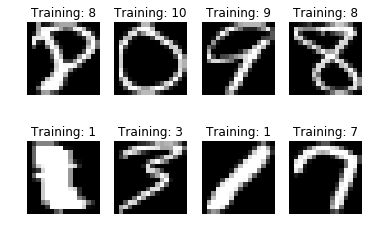

In [3]:
# Variable for the location of subplot
i = 1


# Plotting 
for index in range(8):
    img = test[index].reshape(16, 16)
    rotated_img = sp.ndimage.rotate(img, 90)
    plt.subplot(2, 4, i)
    plt.axis('off')
    plt.imshow(rotated_img, cmap=plt.cm.gray, origin='lower')
    plt.title('Training: ' + str(label_test[index]))
    i = i + 1

plt.show()


## Perform SVC with Linear Kernel on the original images

In [4]:
# Concatenate two matrix in order to perform PCA and Kernel PCA later
comb = np.concatenate((train, test), axis=0)


# Apply Scaling to X_train and X_test
std_scale1 = preprocessing.StandardScaler().fit(train)
train_std = std_scale1.transform(train)

std_scale2 = preprocessing.StandardScaler().fit(test)
test_std = std_scale2.transform(test)


# SVC
clf = svm.SVC(kernel='linear') 
clf.fit(train_std, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
# Now predict the value of the digit on the test set:
expected = label_test
predicted = clf.predict(test_std)


# Print summaries of the classifier
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          1       0.93      0.99      0.96       300
          2       0.91      0.94      0.92       300
          3       0.91      0.92      0.91       300
          4       0.93      0.96      0.95       300
          5       0.92      0.90      0.91       300
          6       0.97      0.95      0.96       300
          7       0.97      0.97      0.97       300
          8       0.94      0.90      0.92       300
          9       0.97      0.94      0.95       300
         10       0.99      0.95      0.97       300

avg / total       0.94      0.94      0.94      3000




## Perform SVC with polynimial kernel on the original images

In [6]:
# Poly SVC with default degree=3
clf = svm.SVC(kernel='poly')
clf.fit(train_std, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Now predict the value of the digit on the test set:
expected = label_test
predicted = clf.predict(test_std)


# Print summaries of the classifier
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          1       0.98      0.99      0.98       300
          2       0.96      0.97      0.97       300
          3       0.98      0.98      0.98       300
          4       0.97      0.99      0.98       300
          5       0.95      0.99      0.97       300
          6       0.99      0.95      0.97       300
          7       0.99      0.98      0.98       300
          8       0.93      0.94      0.94       300
          9       0.98      0.98      0.98       300
         10       0.99      0.97      0.98       300

avg / total       0.97      0.97      0.97      3000




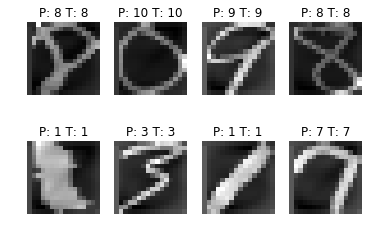

In [8]:
# Variable for the location of subplot
i = 1


# Plotting
for index in range(8):
    img = test_std[index].reshape(16, 16)
    rotated_img = sp.ndimage.rotate(img, 90)
    plt.subplot(2, 4, i)
    plt.axis('off')
    plt.imshow(rotated_img, cmap=plt.cm.gray, origin='lower')
    plt.title('P: ' + str(predicted[index]) + ' T: ' + str(label_test[index]))
    i = i + 1

plt.show()


## Perform Linear PCA, and SVC with Linear Kernel

In [9]:
dimTrain = train.shape
dimTest = test.shape


# Concatenate two matrix in order to perform PCA and Kernel PCA later
comb = np.concatenate((train, test), axis=0)


# Apply Scaling to X_train and X_test
# Standardize features by removing the mean and scaling to unit variance
std_scale = preprocessing.StandardScaler().fit(comb)
comb_std = std_scale.transform(comb)


# Perform PCA
pca = PCA(n_components=256).fit(comb_std)
comb_pca = pca.transform(comb_std)


ratio = 0
count = 0
for i in pca.explained_variance_ratio_:
    ratio += i
    count +=1
    if ratio >= 0.99:
        p = count
        break
        

new_train = comb_pca[0:dimTrain[0],0:p]
new_test = comb_pca[dimTrain[0]:dimTrain[0]+dimTest[0],0:p]
print(new_train.shape)
print(new_test.shape)


(8000, 197)
(3000, 197)


In [10]:
# Poly SVC with degree=3 Polynomial Kernel
clf = svm.SVC(kernel='linear')
clf.fit(new_train, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# Now predict on the test set
expected = label_test
predicted = clf.predict(new_test)


print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          1       0.92      0.99      0.95       300
          2       0.91      0.94      0.93       300
          3       0.90      0.93      0.92       300
          4       0.93      0.97      0.95       300
          5       0.95      0.89      0.92       300
          6       0.98      0.95      0.96       300
          7       0.97      0.96      0.97       300
          8       0.94      0.90      0.92       300
          9       0.96      0.94      0.95       300
         10       0.98      0.96      0.97       300

avg / total       0.94      0.94      0.94      3000




## Perform KernelPCA and with SVC Linear Kernel

In [12]:
# Perform Kernel PCA with Polynomial Kernel 
kpca = KernelPCA(n_components=1000, kernel='poly', degree=3, fit_inverse_transform=True).fit(comb_std)
comb_kpca = kpca.transform(comb_std)


lamda = kpca.lambdas_
eigVar = 0
count = 0
for eigen in lamda:
    count += 1;
    eigVar += eigen / sum(lamda)
    if eigVar >= 0.99:
        p = count
        break
        

In [13]:
new_train = comb_kpca[0:dimTrain[0],0:p]
new_test = comb_kpca[dimTrain[0]:dimTrain[0]+dimTest[0],0:p]
print(new_train.shape)
print(new_test.shape)

(8000, 922)
(3000, 922)


In [14]:
# Perform SVC with linear Kernel
clf = svm.SVC(kernel='linear') 
clf.fit(new_train, label_train)


# Now predict the value of the digit on the test data:
expected = label_test
predicted = clf.predict(new_test)


print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(label_test, predicted)))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          1       0.97      0.99      0.98       300
          2       0.94      0.97      0.96       300
          3       0.97      0.97      0.97       300
          4       0.97      0.99      0.98       300
          5       0.98      0.96      0.97       300
          6       0.99      0.96      0.98       300
          7       0.99      0.98      0.98       300
          8       0.94      0.95      0.94       300
          9       0.98      0.98      0.98       300
         10       1.00      0.98      0.99       300

avg / total       0.97      0.97      0.97      3000




## Below are the summary of precision and recall got by SVC with Linear Kernel

|                             | precision | recall | f1-score | support |
|-----------------------------|-----------|--------|----------|---------|
| Original images             | 0.94      | 0.94   | 0.94     | 3000    |
| Linear PCA                  | 0.94      | 0.94   | 0.94     | 3000    |
| Kernel PCA                  | 0.97      | 0.97   | 0.97     | 3000    |


#### Precision :   True positives / Predicted positives   notation : P
#### Recall:         True positives / Actual positives      notation : R
#### F1-score:     $\frac{2PR}{P+R}$